In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.spatial as spatial
from scipy.optimize import curve_fit

In [457]:
m67_dat = pd.read_csv('/Users/sidneylower/stars_projects/project1/M67.csv')
m44_dat = pd.read_csv('/Users/sidneylower/stars_projects/project1/M44_1.csv')
m71_dat_glob = pd.read_csv('/Users/sidneylower/stars_projects/project1/M71_1.csv')
ngc188_dat = pd.read_csv('/Users/sidneylower/stars_projects/project1/NGC188.csv')
ngc6791_dat = pd.read_csv('/Users/sidneylower/stars_projects/project1/NGC6791.csv')

In [6]:
"""
V = -0.008092(GBP - GRP / 1.286) + GBP
I = (GBP - GRP / 1.286) * (-1.008092 + GBP)
"""

'\nV = -0.008092(GBP - GRP / 1.286) + GBP\nI = (GBP - GRP / 1.286) * (-1.008092 + GBP)\n'

In [50]:
m44_dat

,source_id,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
0,661247117581081344,130.449701,19.544039,3.855002,0.781421,16.062482,1.331666,-32.161974,0.645550,20.065212,20.909658,18.649286
1,661252000959417728,130.306317,19.625577,0.916822,0.201574,0.207333,0.371091,-13.739286,0.204421,18.295052,19.105886,17.308954
2,661312233577516160,129.988270,19.857519,1.307611,1.014471,10.997225,1.704729,-7.076438,1.367781,20.040579,20.558813,18.657118
3,661254642361432960,130.431368,19.733011,-1.014703,0.567615,2.149774,0.918477,-7.873108,0.432088,19.499887,19.669580,18.870504
4,661283985583331584,129.808336,19.586765,NaN,NaN,NaN,NaN,NaN,NaN,21.202950,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2745,664325273397054720,129.865833,19.984109,2.394865,0.988515,4.525029,1.518276,-7.817462,1.066155,19.774810,19.761154,19.008165
2746,664325303459457920,129.876825,19.999691,1.220460,0.462039,14.771065,0.655720,-2.085281,0.373703,18.736393,19.513120,17.655771
2747,664319432241544320,129.768034,19.910251,NaN,NaN,NaN,NaN,NaN,NaN,19.844456,19.188442,17.763144
2748,664316232488735360,129.720806,19.815033,-0.245411,1.634785,-2.422676,2.430928,-2.646651,1.635340,20.681982,20.512768,19.417625


In [602]:
m44_V = m44_dat['phot_g_mean_mag'] + 0.01746 + 0.00686*(m44_dat['phot_bp_mean_mag'] - m44_dat['phot_rp_mean_mag']) + 0.1736*(m44_dat['phot_bp_mean_mag'] - m44_dat['phot_rp_mean_mag'])**2
m44_I = m44_dat['phot_g_mean_mag'] - 0.02085 - 0.7419*(m44_dat['phot_bp_mean_mag'] - m44_dat['phot_rp_mean_mag']) + 0.09631*(m44_dat['phot_bp_mean_mag'] - m44_dat['phot_rp_mean_mag'])**2

m67_V = m67_dat['phot_g_mean_mag'] + 0.01746 + 0.00686*(m67_dat['phot_bp_mean_mag'] - m67_dat['phot_rp_mean_mag']) + 0.1736*(m67_dat['phot_bp_mean_mag'] - m67_dat['phot_rp_mean_mag'])**2
m67_I = m67_dat['phot_g_mean_mag'] - 0.02085 - 0.7419*(m67_dat['phot_bp_mean_mag'] - m67_dat['phot_rp_mean_mag']) + 0.09631*(m67_dat['phot_bp_mean_mag'] - m67_dat['phot_rp_mean_mag'])**2

m71_V = m71_dat_glob['phot_g_mean_mag'] + 0.01746 + 0.00686*(m71_dat_glob['phot_bp_mean_mag'] - m71_dat_glob['phot_rp_mean_mag']) + 0.1736*(m71_dat_glob['phot_bp_mean_mag'] - m71_dat_glob['phot_rp_mean_mag'])**2
m71_I = m71_dat_glob['phot_g_mean_mag'] - 0.02085 - 0.7419*(m71_dat_glob['phot_bp_mean_mag'] - m71_dat_glob['phot_rp_mean_mag']) + 0.09631*(m71_dat_glob['phot_bp_mean_mag'] - m71_dat_glob['phot_rp_mean_mag'])**2

ngc188_V = ngc188_dat['phot_g_mean_mag'] + 0.01746 + 0.00686*(ngc188_dat['phot_bp_mean_mag'] - ngc188_dat['phot_rp_mean_mag']) + 0.1736*(ngc188_dat['phot_bp_mean_mag'] - ngc188_dat['phot_rp_mean_mag'])**2
ngc188_I = ngc188_dat['phot_g_mean_mag'] - 0.02085 - 0.7419*(ngc188_dat['phot_bp_mean_mag'] - ngc188_dat['phot_rp_mean_mag']) + 0.09631*(ngc188_dat['phot_bp_mean_mag'] - ngc188_dat['phot_rp_mean_mag'])**2

ngc6791_V = ngc6791_dat['phot_g_mean_mag'] + 0.01746 + 0.00686*(ngc6791_dat['phot_bp_mean_mag'] - ngc6791_dat['phot_rp_mean_mag']) + 0.1736*(ngc6791_dat['phot_bp_mean_mag'] - ngc6791_dat['phot_rp_mean_mag'])**2
ngc6791_I = ngc6791_dat['phot_g_mean_mag'] - 0.02085 - 0.7419*(ngc6791_dat['phot_bp_mean_mag'] - ngc6791_dat['phot_rp_mean_mag']) + 0.09631*(ngc6791_dat['phot_bp_mean_mag'] - ngc6791_dat['phot_rp_mean_mag'])**2




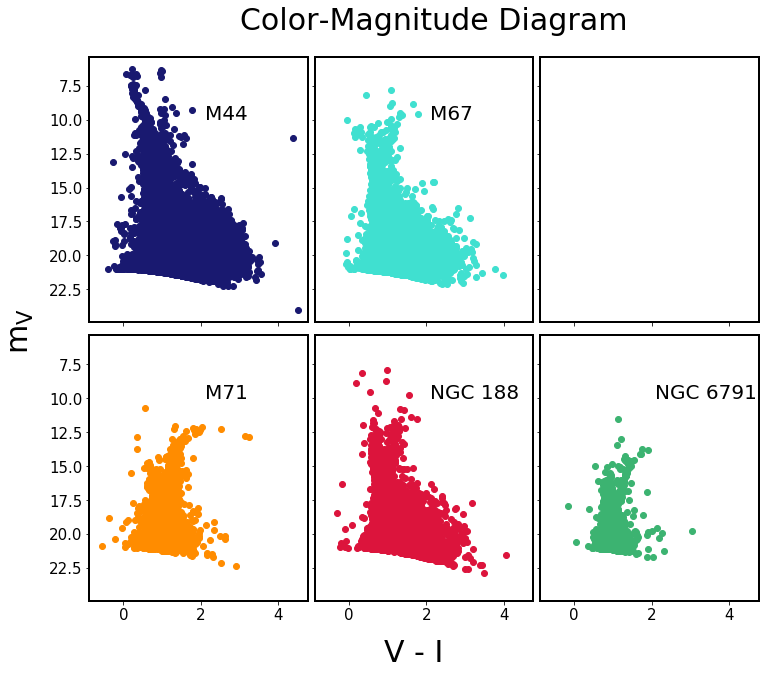

In [647]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.03, hspace=0.05)
plt.rc('axes', linewidth=2)
plt.gca().invert_yaxis()
for ax in axs.flat:
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.tick_params(axis='both', which='minor')
        ax.invert_yaxis()
axs[0, 0].scatter(m44_V - m44_I,m44_V ,color='midnightblue')
axs[0, 1].scatter( m67_V - m67_I,m67_V, color='turquoise')
axs[1, 0].scatter( m71_V - m71_I,m71_V, color='darkorange')
axs[1, 1].scatter( ngc188_V - ngc188_I,ngc188_V, color='crimson')
axs[1, 2].scatter( ngc6791_V - ngc6791_I,ngc6791_V, color='mediumseagreen')


fig.text(0.5, 0.04, 'V - I', ha='center', fontsize=30)
fig.text(0.03, 0.5, 'm$_\mathrm{V}$', va='center', rotation='vertical', fontsize=30)
fig.text(0.3, 0.93, 'Color-Magnitude Diagram', va='center', fontsize=30)

axs[0,0].annotate('M44', xy=(2.1, 10), fontsize=20)
axs[0,1].annotate('M67', xy=(2.1, 10), fontsize=20)
axs[1,0].annotate('M71', xy=(2.1, 10), fontsize=20)
axs[1,1].annotate('NGC 188', xy=(2.1, 10), fontsize=20)
axs[1,2].annotate('NGC 6791', xy=(2.1, 10), fontsize=20)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.savefig('/Users/sidneylower/stars_projects/project1/cmd.png', dpi=300, bbox_inches='tight')

In [549]:
m44_pmra = m44_dat['pmra'] * np.cos(np.deg2rad(m44_dat['dec']))
m44_pmdec = m44_dat['pmdec']

m67_pmra = m67_dat['pmra']* np.cos(np.deg2rad(m67_dat['dec']))
m67_pmdec = m67_dat['pmdec']

m71_pmra = m71_dat_glob['pmra']* np.cos(np.deg2rad(m71_dat_glob['dec']))
m71_pmdec = m71_dat_glob['pmdec']

ngc188_pmra = ngc188_dat['pmra']* np.cos(np.deg2rad(ngc188_dat['dec']))
ngc188_pmdec = ngc188_dat['pmdec']

ngc6791_pmra = ngc6791_dat['pmra']* np.cos(np.deg2rad(ngc6791_dat['dec']))
ngc6791_pmdec = ngc6791_dat['pmdec']

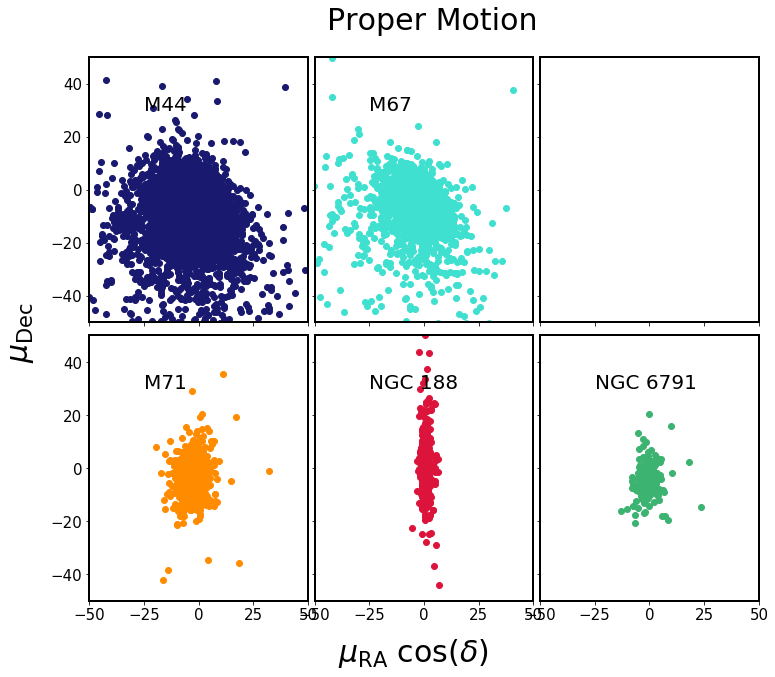

In [649]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.03, hspace=0.05)
plt.rc('axes', linewidth=2)
for ax in axs.flat:
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.tick_params(axis='both', which='minor')
axs[0, 0].scatter(m44_pmra, m44_pmdec, color='midnightblue')
axs[0, 1].scatter(m67_pmra, m67_pmdec, color='turquoise')
axs[1, 0].scatter(m71_pmra, m71_pmdec, color='darkorange')
axs[1, 1].scatter(ngc188_pmra, ngc188_pmdec, color='crimson')
axs[1, 2].scatter(ngc6791_pmra, ngc6791_pmdec, color='mediumseagreen')


fig.text(0.5, 0.04, '$\mu_{\mathrm{RA}}$ cos($\delta$)', ha='center', fontsize=30)
fig.text(0.03, 0.5, '$\mu_{\mathrm{Dec}}$ ', va='center', rotation='vertical', fontsize=30)
fig.text(0.4, 0.93, 'Proper Motion', va='center', fontsize=30)

axs[0,0].annotate('M44', xy=(-25, 30), fontsize=20)
axs[0,1].annotate('M67', xy=(-25, 30), fontsize=20)
axs[1,0].annotate('M71', xy=(-25, 30), fontsize=20)
axs[1,1].annotate('NGC 188', xy=(-25, 30), fontsize=20)
axs[1,2].annotate('NGC 6791', xy=(-25, 30), fontsize=20)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xlim([-50, 50])
    ax.set_ylim([-50, 50])
    
    
plt.savefig('/Users/sidneylower/stars_projects/project1/pm.png', dpi=300, bbox_inches='tight')

In [460]:
fltra = ~np.isnan(m44_pmra)
fltdec = ~np.isnan(m44_pmdec)
m44_pm = np.array([m44_pmra[fltra], m44_pmdec[fltdec]])
m44_cent = m44_pm.mean(axis=1)


pos_list = [np.array(m44_pmra[fltra]), np.array(m44_pmdec[fltdec])]
m44_coords = []
for i in range(len(pos_list[0])):
    m44_coords.append([pos_list[0][i], pos_list[1][i]])
m44_total = len(pos_list[0])
point_tree0 = spatial.cKDTree(m44_coords)
m44_percent = 100
m44_radius = 100
while m44_percent > 0.7:
    freq44 = point_tree0.query_ball_point(m44_cent, m44_radius)
    m44_percent = len(freq44) / m44_total
    m44_radius -= 1

In [461]:
fltra = ~np.isnan(m67_pmra)
fltdec = ~np.isnan(m67_pmdec)
m67_pm = np.array([m67_pmra[fltra], m67_pmdec[fltdec]])
m67_cent = m67_pm.mean(axis=1)

post_list = 0
pos_list = [np.array(m67_pmra[fltra]), np.array(m67_pmdec[fltdec])]
m67_coords = []
for i in range(len(pos_list[0])):
    m67_coords.append([pos_list[0][i], pos_list[1][i]])
m67_total = len(pos_list[0])
point_tree0 = spatial.cKDTree(m67_coords)
m67_percent = 100
m67_radius = 200
while m67_percent > 0.7:
    freq67 = point_tree0.query_ball_point(m67_cent, m67_radius)
    m67_percent = len(freq67) / m67_total
    m67_radius -= 1

In [463]:
fltra = ~np.isnan(m71_pmra)
fltdec = ~np.isnan(m71_pmdec)
m71_pm = np.array([m71_pmra[fltra], m71_pmdec[fltdec]])
m71_cent = m71_pm.mean(axis=1)

post_list = 0
pos_list = [np.array(m71_pmra[fltra]), np.array(m71_pmdec[fltdec])]
m71_coords = []
for i in range(len(pos_list[0])):
    m71_coords.append([pos_list[0][i], pos_list[1][i]])
m71_total = len(pos_list[0])
point_tree0 = spatial.cKDTree(m71_coords)
m71_percent = 100
m71_radius = 25
while m71_percent > 0.7:
    freq71 = point_tree0.query_ball_point(m71_cent, m71_radius)
    print(len(freq71))
    m71_percent = len(freq71) / m71_total
    m71_radius -= 1

6525
6525
6524
6523
6523
6522
6519
6516
6512
6504
6497
6485
6474
6456
6437
6413
6382
6319
6243
6103
5898
5590
5038
4159


In [464]:
fltra = ~np.isnan(ngc188_pmra)
fltdec = ~np.isnan(ngc188_pmdec)
ngc188_pm = np.array([ngc188_pmra[fltra], ngc188_pmdec[fltdec]])
ngc188_cent = ngc188_pm.mean(axis=1)

post_list = 0
pos_list = [np.array(ngc188_pmra[fltra]), np.array(ngc188_pmdec[fltdec])]
ngc188_coords = []
for i in range(len(pos_list[0])):
    ngc188_coords.append([pos_list[0][i], pos_list[1][i]])
ngc188_total = len(pos_list[0])
point_tree0 = spatial.cKDTree(ngc188_coords)
ngc188_percent = 100
ngc188_radius = 200
while ngc188_percent > 0.7:
    freq188 = point_tree0.query_ball_point(ngc188_cent, ngc188_radius)
    ngc188_percent = len(freq188) / ngc188_total
    ngc188_radius -= 1

In [472]:
fltra = ~np.isnan(ngc6791_pmra)
fltdec = ~np.isnan(ngc6791_pmdec)
ngc6791_pm = np.array([ngc6791_pmra[fltra], ngc6791_pmdec[fltdec]])
ngc6791_cent = ngc6791_pm.mean(axis=1)

post_list = 0
pos_list = [np.array(ngc6791_pmra[fltra]), np.array(ngc6791_pmdec[fltdec])]
ngc6791_coords = []
for i in range(len(pos_list[0])):
    ngc6791_coords.append([pos_list[0][i], pos_list[1][i]])
ngc6791_total = len(pos_list[0])
point_tree0 = spatial.cKDTree(ngc6791_coords)
ngc6791_percent = 100
ngc6791_radius = 25
while ngc6791_percent > 0.7:
    freq6791 = point_tree0.query_ball_point(ngc6791_cent, ngc6791_radius)
    ngc6791_percent = len(freq6791) / ngc6791_total
    ngc6791_radius -= 1

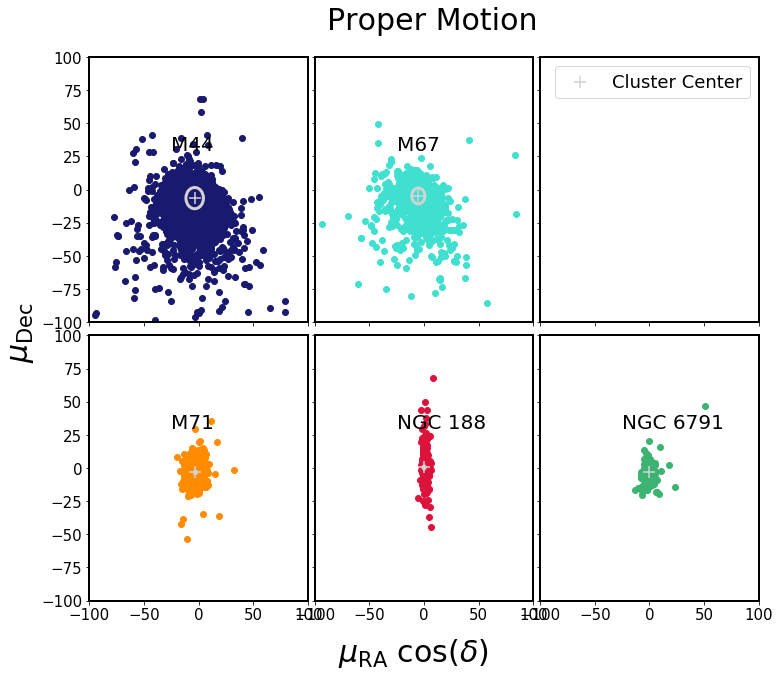

In [656]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.03, hspace=0.05)
plt.rc('axes', linewidth=2)
for ax in axs.flat:
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.tick_params(axis='both', which='minor')
axs[0, 0].scatter(m44_pmra, m44_pmdec, color='midnightblue')
axs[0,0].scatter(m44_cent[0], m44_cent[1],color='lightgrey', s=150, marker='+')
circle44 = plt.Circle((m44_cent[0], m44_cent[1]), m44_radius, fill=False, lw=3, edgecolor='lightgrey')
axs[0,0].add_artist(circle44)
axs[0, 1].scatter(m67_pmra, m67_pmdec, color='turquoise')
axs[0,1].scatter(m67_cent[0], m67_cent[1],color='lightgrey', s=150, marker='+')
circle67 = plt.Circle((m67_cent[0], m67_cent[1]), m67_radius, fill=False, lw=3, edgecolor='lightgrey')
axs[0,1].add_artist(circle67)
axs[1, 0].scatter(m71_pmra, m71_pmdec, color='darkorange')
axs[1,0].scatter(m71_cent[0], m71_cent[1],color='lightgrey', s=150, marker='+')
circle71 = plt.Circle((m71_cent[0], m71_cent[1]), m71_radius, fill=False, lw=3, edgecolor='lightgrey')
axs[1,0].add_artist(circle71)
axs[1, 1].scatter(ngc188_pmra, ngc188_pmdec, color='crimson')
axs[1,1].scatter(ngc188_cent[0], ngc188_cent[1],color='lightgrey', s=150, marker='+')
circle188 = plt.Circle((ngc188_cent[0], ngc188_cent[1]), ngc188_radius, fill=False, lw=3, edgecolor='lightgrey')
axs[1,1].add_artist(circle188)
axs[1, 2].scatter(ngc6791_pmra, ngc6791_pmdec, color='mediumseagreen')
axs[1,2].scatter(ngc6791_cent[0], ngc6791_cent[1],color='lightgrey', s=150, marker='+')
circle6791 = plt.Circle((ngc6791_cent[0], ngc6791_cent[1]), ngc6791_radius, fill=False, lw=3, edgecolor='lightgrey')
axs[1,2].add_artist(circle6791)

axs[0,2].scatter(-120, -120,color='lightgrey', s=150, marker='+', label='Cluster Center')
circle6791 = plt.Circle((ngc6791_cent[0], ngc6791_cent[1]), ngc6791_radius, fill=False, lw=3, edgecolor='lightgrey', label='Cluster Radius')
axs[0,2].add_artist(circle6791)

axs[0,2].legend(loc='best', fontsize=18)

fig.text(0.5, 0.04, '$\mu_{\mathrm{RA}}$ cos($\delta$)', ha='center', fontsize=30)
fig.text(0.03, 0.5, '$\mu_{\mathrm{Dec}}$ ', va='center', rotation='vertical', fontsize=30)
fig.text(0.4, 0.93, 'Proper Motion', va='center', fontsize=30)

axs[0,0].annotate('M44', xy=(-25, 30), fontsize=20)
axs[0,1].annotate('M67', xy=(-25, 30), fontsize=20)
axs[1,0].annotate('M71', xy=(-25, 30), fontsize=20)
axs[1,1].annotate('NGC 188', xy=(-25, 30), fontsize=20)
axs[1,2].annotate('NGC 6791', xy=(-25, 30), fontsize=20)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xlim([-100, 100])
    ax.set_ylim([-100, 100])
    
    
plt.savefig('/Users/sidneylower/stars_projects/project1/pm.png', dpi=300, bbox_inches='tight')

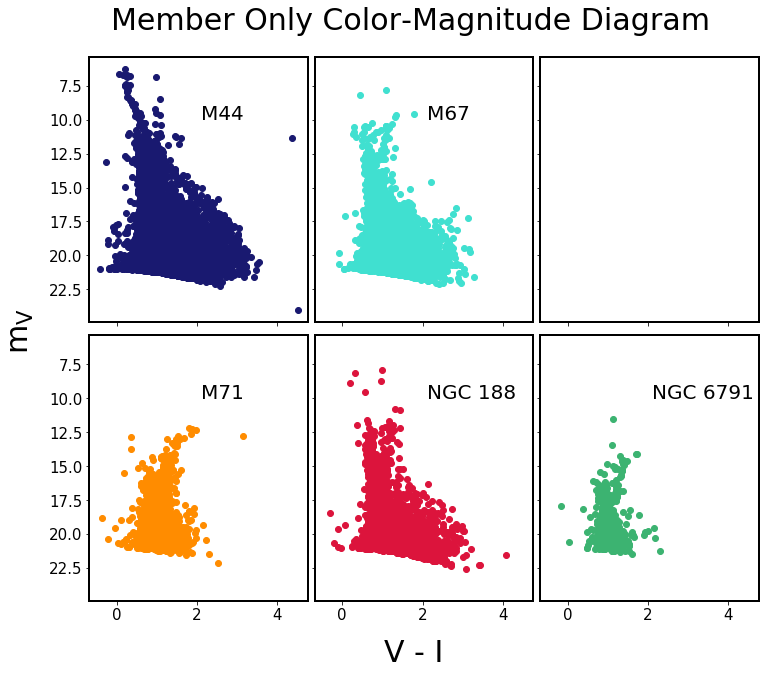

In [660]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.03, hspace=0.05)
plt.rc('axes', linewidth=2)
plt.gca().invert_yaxis()
for ax in axs.flat:
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.tick_params(axis='both', which='minor')
axs[0, 0].scatter( m44_V[freq44] - m44_I[freq44],m44_V[freq44], color='midnightblue')
axs[0, 1].scatter( m67_V[freq67] - m67_I[freq67], m67_V[freq67],color='turquoise')
axs[1, 0].scatter( m71_V[freq71] - m71_I[freq71], m71_V[freq71],color='darkorange')
axs[1, 1].scatter( ngc188_V[freq188] - ngc188_I[freq188], ngc188_V[freq188],color='crimson')
axs[1, 2].scatter( ngc6791_V[freq6791] - ngc6791_I[freq6791], ngc6791_V[freq6791],color='mediumseagreen')


fig.text(0.5, 0.04, 'V - I', ha='center', fontsize=30)
fig.text(0.03, 0.5, 'm$_{\mathrm{V}}$', va='center', rotation='vertical', fontsize=30)
fig.text(0.15, 0.93, 'Member Only Color-Magnitude Diagram', va='center', fontsize=30)

axs[0,0].annotate('M44', xy=(2.1, 10), fontsize=20)
axs[0,1].annotate('M67', xy=(2.1, 10), fontsize=20)
axs[1,0].annotate('M71', xy=(2.1, 10), fontsize=20)
axs[1,1].annotate('NGC 188', xy=(2.1, 10), fontsize=20)
axs[1,2].annotate('NGC 6791', xy=(2.1, 10), fontsize=20)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
    
plt.savefig('/Users/sidneylower/stars_projects/project1/member_cmd.png', dpi=300, bbox_inches='tight')

In [475]:
m44_par = m44_dat['parallax'][freq44]
m67_par = m67_dat['parallax'][freq67]
m71_par = m71_dat_glob['parallax'][freq71]
ngc188_par = ngc188_dat['parallax'][freq188]
ngc6791_par = ngc6791_dat['parallax'][freq6791]

In [487]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))
x = np.linspace(0, 8, 100)

In [488]:
p0 = [1., 0.5, 1.]

bins44 = (bins[:-1] + bins[1:])/2

coeff44, _ = curve_fit(gauss, bins44, n44, p0=[1, 1, 1])
fit_44 = gauss(x, *coeff44)
coeff44_2, _ = curve_fit(gauss, bins44, n44, p0=[0.1, 6, 0.1])
fit_44_2 = gauss(x, *coeff44_2)

coeff67, _ = curve_fit(gauss, bins44, n67, p0=[1, 0.5, 1])
fit_67 = gauss(x, *coeff67)

coeff71, _ = curve_fit(gauss, bins44, n71, p0=[1, 0.1, 0.5])
fit_71 = gauss(x, *coeff71)

coeff188, _ = curve_fit(gauss, bins44, n188, p0=[0.5, 0.5, 0.5])
fit_188 = gauss(x, *coeff188)

coeff6791, _ = curve_fit(gauss, bins44, n6791, p0=[1, 0.2, 0.2])
fit_6791 = gauss(x, *coeff6791)

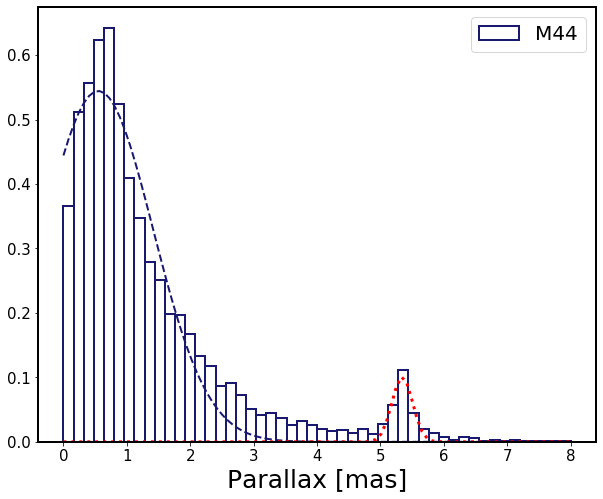

In [662]:
fig = plt.figure(figsize=(10, 8))
plt.rc('axes', linewidth=2)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor')
n44, bins, _ = plt.hist(m44_par[m44_dat['parallax'][freq44] > 0], range=(0, 8), bins=50, fill=False, lw=2, edgecolor='midnightblue', density=True, label='M44')
plt.plot(x, fit_44, color='midnightblue', lw=2, ls='--')
plt.plot(x, fit_44_2, color='red', lw=3, ls=':')


plt.xlabel('Parallax [mas]', fontsize=25)

plt.legend(loc='best', fontsize=20)

plt.savefig('/Users/sidneylower/stars_projects/project1/par_44.png', dpi=300, bbox_inches='tight')

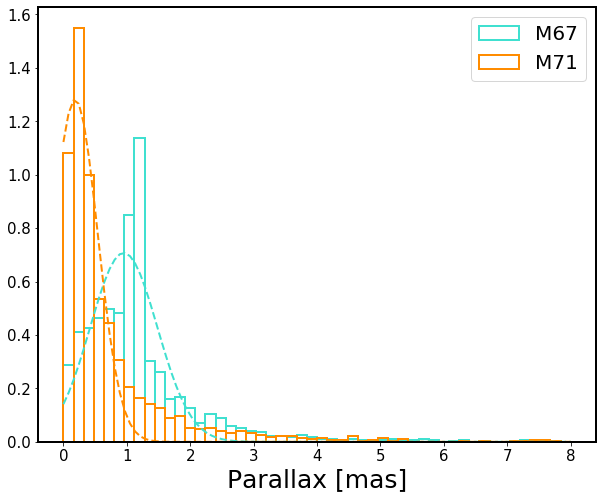

In [663]:
fig = plt.figure(figsize=(10, 8))
plt.rc('axes', linewidth=2)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor')
n67, _, _ = plt.hist(m67_par[m67_dat['parallax'][freq67] > 0],range=(0, 8), bins=50, fill=False,lw=2, edgecolor='turquoise', density=True, label='M67')
plt.plot(x, fit_67, color='turquoise', lw=2, ls='--')
n71, _, _ = plt.hist(m71_par[m71_dat_glob['parallax'][freq71] > 0], range=(0, 8),bins=50, fill=False, lw=2,edgecolor='darkorange', density=True, label='M71')
plt.plot(x, fit_71, color='darkorange', lw=2, ls='--')

plt.xlabel('Parallax [mas]', fontsize=25)

plt.legend(loc='best', fontsize=20)
plt.savefig('/Users/sidneylower/stars_projects/project1/par_67_71.png', dpi=300, bbox_inches='tight')

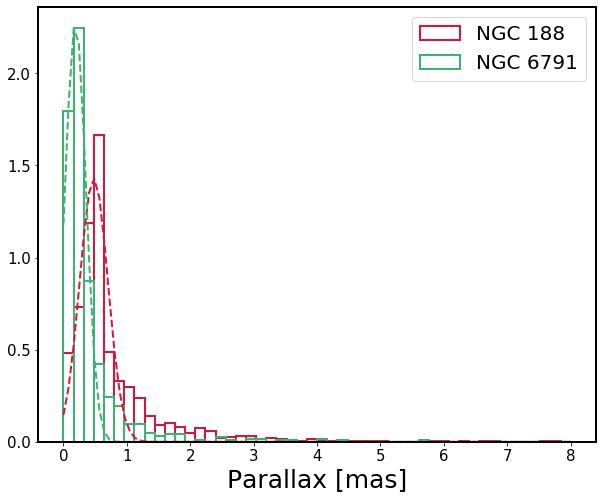

In [664]:
fig = plt.figure(figsize=(10, 8))
plt.rc('axes', linewidth=2)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor')
n188, _, _ = plt.hist(ngc188_par[ngc188_dat['parallax'][freq188] > 0], range=(0, 8),bins=50, fill=False, lw=2,edgecolor='crimson', density=True, label='NGC 188')
plt.plot(x, fit_188, color='crimson', lw=2, ls='--')
n6791, _, _ = plt.hist(ngc6791_par[ngc6791_dat['parallax'][freq6791] > 0], range=(0, 8),bins=50, fill=False,lw=2, edgecolor='mediumseagreen', density=True, label='NGC 6791')
plt.plot(x, fit_6791, color='mediumseagreen', lw=2, ls='--')
plt.xlabel('Parallax [mas]', fontsize=25)


plt.legend(loc='best', fontsize=20)

plt.savefig('/Users/sidneylower/stars_projects/project1/par_ngc.png', dpi=300, bbox_inches='tight')

In [495]:
coeffs = [coeff44_2, coeff67, coeff71, coeff188, coeff6791]

In [665]:
mean_pars = [item[1] for item in coeffs]
sigma_pars = [item[2] for item in coeffs]

In [497]:
mean_pars

[5.343462161233264,
 0.9513812621652709,
 0.18443138083061308,
 0.4786804185243609,
 0.19019557346131843]

In [666]:
sigma_pars

[0.16253936174019437,
 0.529802722775348,
 0.35741547476544233,
 0.22370295378125582,
 0.16569016614988544]

In [292]:
"""
m - M = mu = distance modulus

mu = 5log(d) = 5 * log(1 / p [arcsecond])
"""

'\nm - M = mu = distance modulus\n\nmu = 5log(d) = 5 * log(1 / p [arcsecond])\n'

In [498]:
moduli = [] #pc
for i in range(len(mean_pars)):
    moduli.append(5 * np.log10(1 / (mean_pars[i] / 1000) / 10))

In [499]:
moduli

[6.360886308204758,
 10.108227032177616,
 13.670825910932912,
 11.59977168962969,
 13.60399797441926]

In [500]:
"""
Literature Values

M44 = 6.3 (Khalaj + 2013)
M67 = 9.69 (SARAJEDINI + 1999)
M71 = 12.9 (Salaris & Cassisi 1997)
NGC188 = 11.44 (SARAJEDINI + 1999)
NGC6791 = 13.09 (Wu + 2014)
"""

'\nLiterature Values\n\nM44 = 6.3 (Khalaj + 2013)\nM67 = 9.69 (SARAJEDINI + 1999)\nM71 = 12.9 (Salaris & Cassisi 1997)\nNGC188 = 11.44 (SARAJEDINI + 1999)\nNGC6791 = 13.09 (Wu + 2014)\n'

In [612]:
m44_members = m44_dat['parallax'] > 4
MV_44 = m44_V[m44_members] - 2.5*(0.5) - 5*np.log10(1./(m44_dat['parallax'][m44_members] / 1000.) / 10)
m44_intrinsic_diff = (m44_V[m44_members] - m44_I[m44_members]) - (2.5 * 0.5)

m67_members = m67_dat['parallax'] > 1
MV_67 = m67_V[m67_members] - 2.5*(0.5) - 5* np.log10(1/(m67_dat['parallax'][m67_members] / 1000.) / 10) 
m67_intrinsic_diff = (m67_V[m67_members] - m67_I[m67_members]) - 2.5 * 0.5

MV_71 = m71_V[freq71] - 2.5*(0.5) - 5*np.log10(1/(m71_par / 1000.) /10)
m71_intrinsic_diff = (m71_V[freq71] - m71_I[freq71]) - 2.5 * 0.5


MV_188 = ngc188_V[freq188] - 2.5*(0.5) - 5*np.log10(1/(ngc188_par / 1000.) / 10)
ngc188_intrinsic_diff = (ngc188_V[freq188] - ngc188_I[freq188]) - 2.5 * 0.5

MV_6791 = ngc6791_V[freq6791] - 2.5*(0.5) - 5*np.log10(1/(ngc6791_par / 1000.)/10) 
ngc6791_intrinsic_diff = (ngc6791_V[freq6791] - ngc6791_I[freq6791]) - 2.5 * 0.5

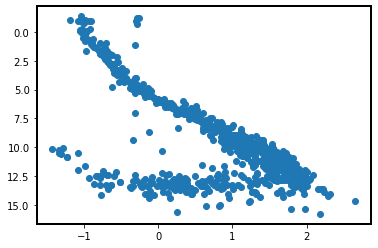

In [614]:
plt.scatter(m44_intrinsic_diff, MV_44)
plt.gca().invert_yaxis()

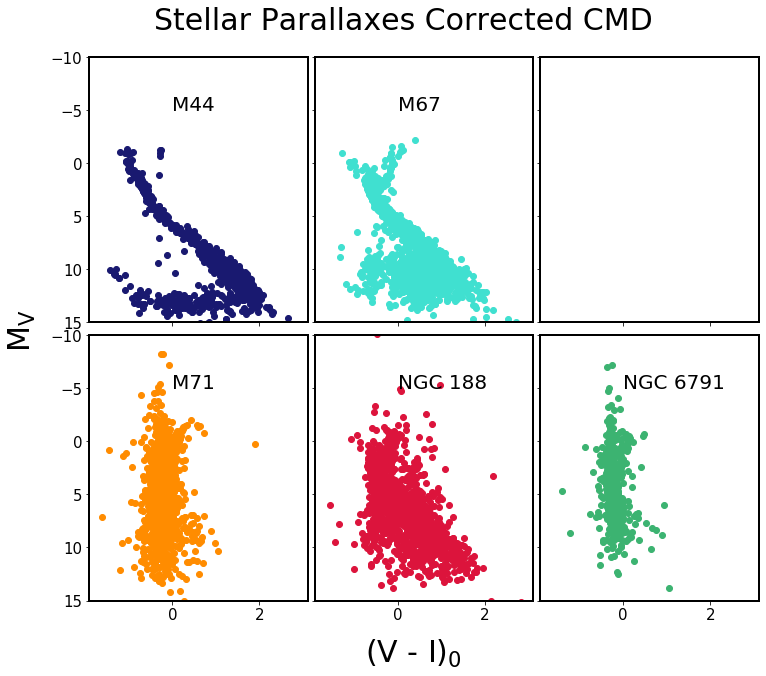

In [673]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.03, hspace=0.05)
plt.rc('axes', linewidth=2)
for ax in axs.flat:
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.tick_params(axis='both', which='minor')
        ax.set_ylim([-10, 15])
plt.gca().invert_yaxis()
axs[0, 0].scatter( m44_intrinsic_diff, MV_44,color='midnightblue')
axs[0, 1].scatter( m67_intrinsic_diff,MV_67, color='turquoise')
axs[1, 0].scatter( m71_intrinsic_diff, MV_71,color='darkorange')
axs[1, 1].scatter( ngc188_intrinsic_diff, MV_188,color='crimson')
axs[1, 2].scatter( ngc6791_intrinsic_diff,MV_6791, color='mediumseagreen')


fig.text(0.5, 0.04,'(V - I)$_0$' , ha='center', fontsize=30)
fig.text(0.03, 0.5, 'M$_{\mathrm{V}}$', va='center', rotation='vertical', fontsize=30)
fig.text(0.2, 0.93, 'Stellar Parallaxes Corrected CMD', va='center', fontsize=30)

axs[0,0].annotate('M44', xy=(0, -5), fontsize=20)
axs[0,1].annotate('M67', xy=(0, -5), fontsize=20)
axs[1,0].annotate('M71', xy=(0, -5), fontsize=20)
axs[1,1].annotate('NGC 188', xy=(0, -5), fontsize=20)
axs[1,2].annotate('NGC 6791', xy=(0, -5), fontsize=20)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
    
plt.savefig('/Users/sidneylower/stars_projects/project1/stars_cmd.png', dpi=300, bbox_inches='tight')

In [618]:
m44_members = m44_dat['parallax'] > 4
MV_44_cl = m44_V[m44_members] - 2.5*(0.5) - 5 * np.log10(1 / (mean_pars[0] / 1000) / 10)

m67_members = m67_dat['parallax'] > 1
MV_67_cl = m67_V[m67_members] - 2.5*(0.5) - 5 * np.log10(1 / (mean_pars[1] / 1000) / 10)

MV_71_cl = m71_V[freq71] - 2.5*(0.5) - 5 * np.log10(1 / (mean_pars[2] / 1000) / 10)


MV_188_cl = ngc188_V[freq188] - 2.5*(0.5) - 5 * np.log10(1 / (mean_pars[3] / 1000) / 10)

MV_6791_cl = ngc6791_V[freq6791] - 2.5*(0.5) - 5 * np.log10(1 / (mean_pars[4] / 1000) / 10)

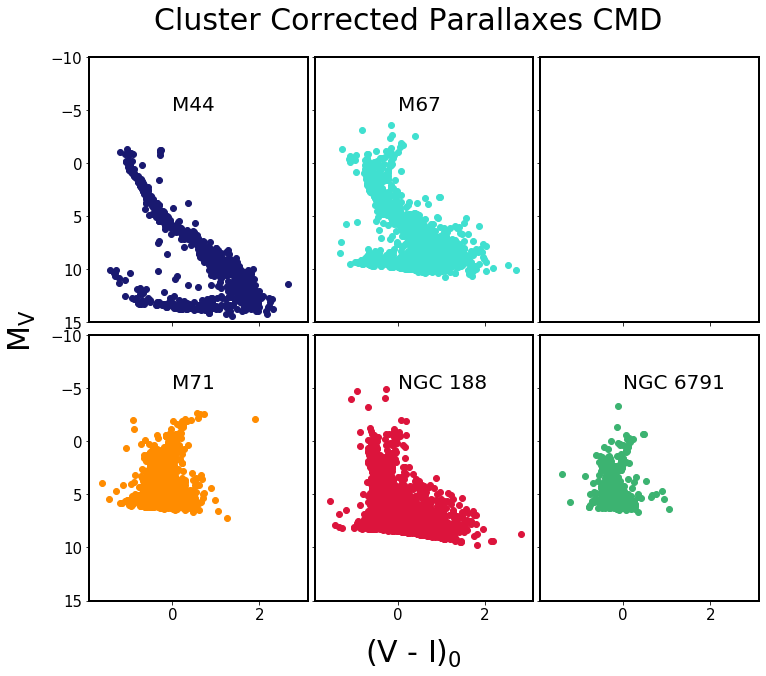

In [674]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.03, hspace=0.05)
plt.rc('axes', linewidth=2)

for ax in axs.flat:
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.tick_params(axis='both', which='minor')
        ax.set_ylim([-10, 15])
plt.gca().invert_yaxis()
axs[0, 0].scatter(m44_intrinsic_diff, MV_44_cl, color='midnightblue')
axs[0, 1].scatter( m67_intrinsic_diff, MV_67_cl,color='turquoise')
axs[1, 0].scatter( m71_intrinsic_diff, MV_71_cl,color='darkorange')
axs[1, 1].scatter(ngc188_intrinsic_diff, MV_188_cl, color='crimson')
axs[1, 2].scatter( ngc6791_intrinsic_diff, MV_6791_cl,color='mediumseagreen')


fig.text(0.5, 0.04, '(V - I)$_0$', ha='center', fontsize=30)
fig.text(0.03, 0.5, 'M$_{\mathrm{V}}$',  va='center', rotation='vertical', fontsize=30)
fig.text(0.2, 0.93, 'Cluster Corrected Parallaxes CMD', va='center', fontsize=30)

axs[0,0].annotate('M44', xy=(0, -5), fontsize=20)
axs[0,1].annotate('M67', xy=(0, -5), fontsize=20)
axs[1,0].annotate('M71', xy=(0, -5), fontsize=20)
axs[1,1].annotate('NGC 188', xy=(0, -5), fontsize=20)
axs[1,2].annotate('NGC 6791', xy=(0, -5), fontsize=20)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
    
plt.savefig('/Users/sidneylower/stars_projects/project1/cl_cmd.png', dpi=300, bbox_inches='tight')

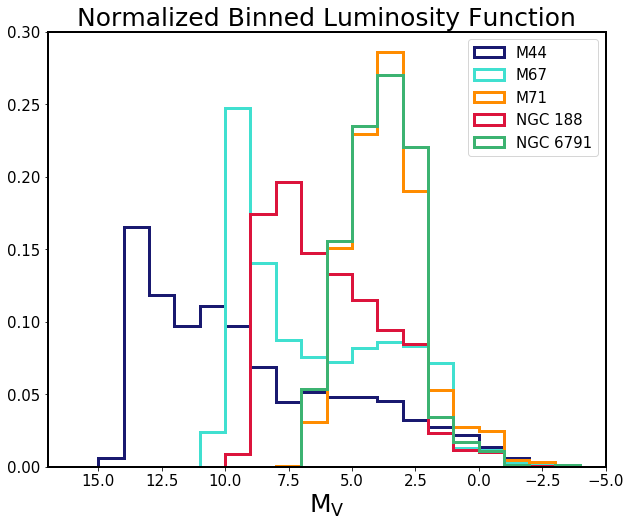

In [675]:
fig = plt.figure( figsize=(10, 8))
plt.rc('axes', linewidth=2)
plt.gca().invert_xaxis()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor')
_, _ ,_ =plt.hist(MV_44_cl, bins=20, range=(-4, 16), color='midnightblue', lw=3, histtype='step', density=True, label='M44')
_, _ ,_ =plt.hist(MV_67_cl, bins=20, range=(-4, 16), color='turquoise', lw=3, histtype='step', density=True,label='M67')
_, _ ,_ =plt.hist(MV_71_cl, bins=20, range=(-4, 16), color='darkorange', lw=3, histtype='step', density=True,label='M71')
_, _ ,_ =plt.hist(MV_188_cl, bins=20, range=(-4, 16), color='crimson', lw=3, histtype='step', density=True,label='NGC 188')
_, _ ,_ =plt.hist(MV_6791_cl, bins=20, range=(-4, 16), color='mediumseagreen', lw=3, histtype='step', density=True,label='NGC 6791')



plt.xlabel('M$_{\mathrm{V}}$', fontsize=25)
plt.title('Normalized Binned Luminosity Function', fontsize=25)
plt.legend(loc='best', fontsize=15)

plt.savefig('/Users/sidneylower/stars_projects/project1/lum_func.png', dpi=300, bbox_inches='tight')

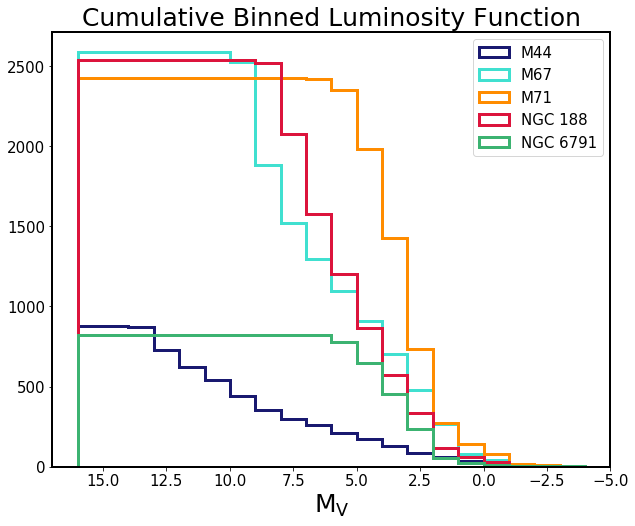

In [676]:
fig = plt.figure( figsize=(10, 8))
plt.rc('axes', linewidth=2)
plt.gca().invert_xaxis()
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor')
_, _ ,_ =plt.hist(MV_44_cl, bins=20, range=(-4, 16), color='midnightblue', lw=3, histtype='step', cumulative=True, label='M44')
_, _ ,_ =plt.hist(MV_67_cl, bins=20, range=(-4, 16), color='turquoise', lw=3, histtype='step', cumulative=True,label='M67')
_, _ ,_ =plt.hist(MV_71_cl, bins=20, range=(-4, 16), color='darkorange', lw=3, histtype='step', cumulative=True,label='M71')
_, _ ,_ =plt.hist(MV_188_cl, bins=20, range=(-4, 16), color='crimson', lw=3, histtype='step', cumulative=True,label='NGC 188')
_, _ ,_ =plt.hist(MV_6791_cl, bins=20, range=(-4, 16), color='mediumseagreen', lw=3, histtype='step', cumulative=True,label='NGC 6791')



plt.xlabel('M$_{\mathrm{V}}$', fontsize=25)
plt.title('Cumulative Binned Luminosity Function', fontsize=25)
plt.legend(loc='best', fontsize=15)
plt.savefig('/Users/sidneylower/stars_projects/project1/cum_lum.png', dpi=300, bbox_inches='tight')